# Access ESASky products with astroquery.esasky

##### Authors: Ivan Valtchanov, Belén López Martí, H. Norman, Nuria Álvarez Crespo

#### Last update: Jul 07, 2021


This notebook illustrates some example usages of the ESASky implementation in astroquery.

First you need to install astroquery and esasky.

Astroquery can be installed with `pip install --pre astroquery`, the latest version should come with esasky. Alternatively, you can grab the latest astroquery with esasky from [here](https://github.com/astropy/astroquery/).

The documentation for astroquery.esasky is available [here](https://astroquery.readthedocs.io/en/latest/esasky/esasky.html).




### Use Case 1: Retrieve imaging data for a single object

In this use case, imaging data are retrieved for a single object, indicated by its name (resolved by Simbad) or coordinates.

We start by importing the ESASky astroquery module and other necessary packages:


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
from astroquery.esasky import ESASky

Created TAP+ (v20200428.1) - Connection:
	Host: sky.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


First, let's check the available maps: 

In [2]:
ESASky.list_maps()

['INTEGRAL',
 'XMM',
 'Chandra',
 'SUZAKU',
 'XMM-OM-OPTICAL',
 'XMM-OM-UV',
 'HST-UV',
 'HST-OPTICAL',
 'HST-IR',
 'ISO-IR',
 'Herschel',
 'AKARI',
 'Spitzer',
 'ALMA']

Let's do a search around the position of our object:

In [3]:
maps = ESASky.query_object_maps(position='M51')
print (maps)

TableList with 12 tables:
	'0:INTEGRAL' with 18 column(s) and 1 row(s) 
	'1:XMM' with 15 column(s) and 11 row(s) 
	'2:CHANDRA' with 53 column(s) and 17 row(s) 
	'3:XMM-OM-OPTICAL' with 17 column(s) and 12 row(s) 
	'4:XMM-OM-UV' with 17 column(s) and 19 row(s) 
	'5:HST-UV' with 15 column(s) and 19 row(s) 
	'6:HST-OPTICAL' with 15 column(s) and 260 row(s) 
	'7:HST-IR' with 15 column(s) and 41 row(s) 
	'8:ISO-IR' with 18 column(s) and 7 row(s) 
	'9:HERSCHEL' with 15 column(s) and 9 row(s) 
	'10:AKARI' with 11 column(s) and 3 row(s) 
	'11:SPITZER' with 14 column(s) and 4 row(s) 


The output is a TableList with the keys corresponding to the mission (or in some cases, mission and instrument) names for which there are images available covering our target position.

We can also do a search by coordinates, either by using an [astroquery.coordinates](http://docs.astropy.org/en/stable/coordinates/) object or by typing the coordinates. In this latter case, we have to define the units we are using (d = degrees; h = hours; m = minutes; s = seconds).

In [4]:
maps = ESASky.query_object_maps(position='13h29m52.7s +47d11m43s')
print (maps)

TableList with 12 tables:
	'0:INTEGRAL' with 18 column(s) and 1 row(s) 
	'1:XMM' with 15 column(s) and 11 row(s) 
	'2:CHANDRA' with 53 column(s) and 17 row(s) 
	'3:XMM-OM-OPTICAL' with 17 column(s) and 12 row(s) 
	'4:XMM-OM-UV' with 17 column(s) and 19 row(s) 
	'5:HST-UV' with 15 column(s) and 19 row(s) 
	'6:HST-OPTICAL' with 15 column(s) and 260 row(s) 
	'7:HST-IR' with 15 column(s) and 41 row(s) 
	'8:ISO-IR' with 18 column(s) and 7 row(s) 
	'9:HERSCHEL' with 15 column(s) and 9 row(s) 
	'10:AKARI' with 11 column(s) and 3 row(s) 
	'11:SPITZER' with 14 column(s) and 4 row(s) 


The method has a tolerance of 5 arcsec to allow for positional errors.

Let's check the content of the 'XMM-OM-OPTICAL' table:

In [5]:
maps['XMM-OM-UV'].info

<Table length=19>
        name          dtype  unit                description               
-------------------- ------- ---- -----------------------------------------
             dec_deg float64                                               
            duration   int64    s        Total exposure time of observation
             end_utc  object                                               
              filter  object                                         Filter
                 fov  object                                               
          instrument  object                                     Instrument
      observation_id  object      The XMM-Newton observation identification
     observation_oid   int32                Observation internal identifier
      position_angle float64                                               
        postcard_url  object       The URL to download the postcard preview
         product_url  object                The URL to download the pr

As we see, it contains a table with URLs for the maps, and some additional info, like map ra, dec, bandpass ('filter'), or the exposure time ('duration').

Let's now see what bands are available:

In [6]:
maps['XMM-OM-OPTICAL']['observation_id', 'instrument', 'filter', 'duration'].pprint()

observation_id instrument filter duration
                                    s    
-------------- ---------- ------ --------
    0830191501         OM      U    63000
    0830191601         OM      B    63000
    0830191601         OM      U    63000
    0212480801         OM      U    49214
    0212480801         OM      B    49214
    0212480801         OM      V    49214
    0303420101         OM      U    54114
    0852030101         OM      B    77000
    0824450901         OM      B    78000
    0830191401         OM      U    98000
    0830191401         OM      B    98000
    0830191501         OM      B    63000


The result is stored in memory. To get the actual images:

In [7]:
#
# set the download dir for ESASky products
#
download_dir = os.path.expanduser('~') + '/Downloads/' # change this to your desired directory

maps_data = ESASky.get_maps(query_table_list=maps, missions='XMM-OM-OPTICAL', download_dir=download_dir)  

INFO: Starting download of XMM-OM-OPTICAL data. (12 files) [astroquery.esasky.core]
INFO: Downloading Observation ID: 0830191501 from http://nxsa.esac.esa.int/nxsa-sl/servlet/data-action?RETRIEVAL_TYPE=PRODUCT&OBS_IMAGE_TYPE=OBS_OM_U&PROTOCOL=HTTP&OBSERVATION_ID=0830191501 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 0830191601 from http://nxsa.esac.esa.int/nxsa-sl/servlet/data-action?RETRIEVAL_TYPE=PRODUCT&OBS_IMAGE_TYPE=OBS_OM_B&PROTOCOL=HTTP&OBSERVATION_ID=0830191601 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 0830191601 from http://nxsa.esac.esa.int/nxsa-sl/servlet/data-action?RETRIEVAL_TYPE=PRODUCT&OBS_IMAGE_TYPE=OBS_OM_U&PROTOCOL=HTTP&OBSERVATION_ID=0830191601 [astroquery.esasky.core]
INFO: [Done] [astroquery.esasky.core]
INFO: Downloading Observation ID: 0212480801 from http://nxsa.esac.esa.int/nxsa-sl/servlet/data-action?RETRIEVAL_TYPE=PRODUCT&OBS_IMAGE_TYPE=OBS_OM_U&PROTOCO

In [8]:
maps_data

{'XMM-OM-OPTICAL': [[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x13DFB130>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13C0D050>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13E4C2B0>],
  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x13E7AF30>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13E4C310>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13E4C350>],
  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x05EEA250>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13DB1090>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13DB1C50>],
  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1398B470>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13DB1A50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13E58210>],
  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x13DBDFB0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13E58330>, <astropy.io.fits.hdu.image.ImageHDU object at 0x13DC3930>],
  [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x13DD74F0>, <as

The output maps_data is a product containing all the FITS files in memory, which are also downloaded to a local folder. If no folder is specified, the current working directory is used by default.

It is possible to download all the available images at once by typing 'all' as the mission name in the ESASky.get_maps() method.
    
We are ready to work with these maps. For example, let's inspect the header of one of them:

In [9]:
hdu = maps_data['XMM-OM-OPTICAL'][3]
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1339 / length of data axis 1                          
NAXIS2  =                 1373 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
XPROC0  = 'ommosaic imagesets=''product/P0212480801OMS007SIMAGE2000.FIT produc&'
CONTINUE  't/P0212480801OMS405SIMAGE2000.FIT product/P0212480801OMS406SIMAGE20&'
CONTINUE  '00.FIT product/P0212480801OMS407SIMAGE2000.FIT product/P0212480801O&'
CONTINUE  'MS408SIMAGE2000.FIT'' mosaicedset=product/P0212480801OMX000USIMAGU0&'
CONTINUE  '00.FIT correlset='''' nsigma=2 mincorr=0 minfraction=0.5 maxdx=5 bi&'
CONTINUE  'naxis=0 numintervals=2 di=10 minnumpixels=100 # (ommosaic-2.10) [xm&'
CONTINUE  'msas_20190401_182

Let's now display it:

c:\users\henrik\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\image.py:412: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


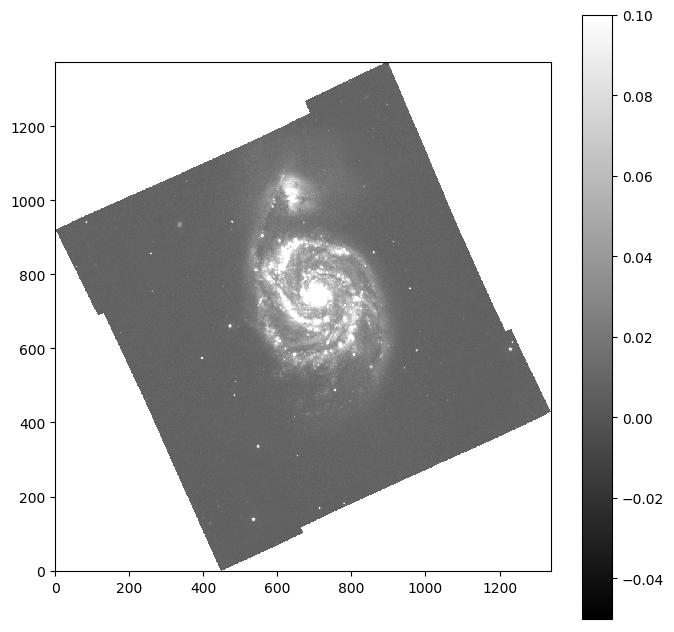

In [10]:
image = hdu[0].data

from astropy import visualization 
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize, ManualInterval)

# Create an ImageNormalize object
#norm = ImageNormalize(image, interval=MinMaxInterval(), stretch=SqrtStretch())
norm = ImageNormalize(image, interval = ManualInterval(-0.05,0.1))

# Display the image
fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(image, cmap='gray', origin='lower', norm=norm)
fig.colorbar(im)



### Use Case 2: Retrieve catalogue data for a single object

We will now inspect and retrieve the catalogue data available for a given object, using either a name (resolved by Simbad) or coordinates.

As we did in Use Case 1 with the images, let's first get a list of the available catalogues:


In [11]:
ESASky.list_catalogs()

['LAMOST',
 'AllWise',
 'AKARI-IRC-SC',
 'TwoMASS',
 'INTEGRAL',
 'CHANDRA-SC2',
 'XMM-EPIC-STACK',
 'XMM-EPIC',
 'XMM-OM',
 'XMM-SLEW',
 'Tycho-2',
 'Gaia-eDR3',
 'Hipparcos-2',
 'HSC',
 'Herschel-HPPSC-070',
 'Herschel-HPPSC-100',
 'Herschel-HPPSC-160',
 'Herschel-SPSC-250',
 'Herschel-SPSC-350',
 'Herschel-SPSC-500',
 'Planck-PGCC',
 'Planck-PCCS2E-HFI',
 'Planck-PCCS2-HFI',
 'Planck-PCCS2-LFI',
 'Planck-PSZ2']

We can look for an object in these catalogues by name or coordinates:

In [12]:
cats = ESASky.query_object_catalogs(position='M51')
print (cats)

TableList with 9 tables:
	'0:ALLWISE' with 25 column(s) and 1 row(s) 
	'1:TWOMASS' with 14 column(s) and 3 row(s) 
	'2:CHANDRA-SC2' with 41 column(s) and 9 row(s) 
	'3:XMM-EPIC-STACK' with 345 column(s) and 1 row(s) 
	'4:XMM-EPIC' with 220 column(s) and 11 row(s) 
	'5:XMM-OM' with 122 column(s) and 5 row(s) 
	'6:HSC' with 27 column(s) and 230 row(s) 
	'7:HERSCHEL-HPPSC-070' with 21 column(s) and 1 row(s) 
	'8:HERSCHEL-HPPSC-100' with 21 column(s) and 1 row(s) 


In [13]:
cats = ESASky.query_object_catalogs(position='13h29m52.7s +47d11m43s')
print (cats)

TableList with 9 tables:
	'0:ALLWISE' with 25 column(s) and 1 row(s) 
	'1:TWOMASS' with 14 column(s) and 2 row(s) 
	'2:CHANDRA-SC2' with 41 column(s) and 9 row(s) 
	'3:XMM-EPIC-STACK' with 345 column(s) and 1 row(s) 
	'4:XMM-EPIC' with 220 column(s) and 11 row(s) 
	'5:XMM-OM' with 122 column(s) and 5 row(s) 
	'6:HSC' with 27 column(s) and 231 row(s) 
	'7:HERSCHEL-HPPSC-070' with 21 column(s) and 1 row(s) 
	'8:HERSCHEL-HPPSC-100' with 21 column(s) and 1 row(s) 


As in the previous use case, the query results are stored in a TableList with the keys corresponding to the catalog name. 

It is also possible to specify the catalogues to search:

In [14]:
cats = ESASky.query_object_catalogs(position='M51', catalogs=['XMM-EPIC','XMM-SLEW', 'HSC'])
print (cats)

TableList with 2 tables:
	'0:XMM-EPIC' with 220 column(s) and 11 row(s) 
	'1:HSC' with 27 column(s) and 230 row(s) 


In this example, we only get two tables, because there are no available sources in the XMM-SLEW catalogue.

Let's now visualise the XMM-EPIC results table:

In [15]:
hsc_table = cats['HSC']
hsc_table.info()

<Table length=230>
         name          dtype        unit                                                                      description                                                                
--------------------- ------- --------------- -------------------------------------------------------------------------------------------------------------------------------------------
             abs_corr  object                                                              Y/N indicator of whether the astrometric correction included alignment with a standard catalog
                   ci float64                 Normalized (by detector and filter) mean value of Concentration Index, defined as difference between magnitude in small and large apertures
             ci_sigma float64                                                                                                   Std dev in measurements of normalized Concentration Index
                  dec float64             deg      

In [16]:
print (hsc_table)

abs_corr         ci         ...          y                   z         
                            ...                                        
-------- ------------------ ... -------------------- ------------------
       Y 3.2462957073308605 ... -0.25972112925441787 0.7336669758079536
       Y 3.2462957073308605 ... -0.25972112925441787 0.7336669758079536
       Y 3.2462957073308605 ... -0.25972112925441787 0.7336669758079536
       Y 3.2462957073308605 ... -0.25972112925441787 0.7336669758079536
       Y 3.2462957073308605 ... -0.25972112925441787 0.7336669758079536
       Y 3.2462957073308605 ... -0.25972112925441787 0.7336669758079536
       Y 3.1274725137085753 ...  -0.2597201914230254 0.7336636936033848
       Y 3.1274725137085753 ...  -0.2597201914230254 0.7336636936033848
       Y 3.0291378498077393 ...   -0.259721191276137 0.7336619947383093
       Y  2.477840943769975 ...  -0.2597191720847075    0.7336613582694
     ...                ... ...                  ...            

We can also choose the columns to display:

In [17]:
print (hsc_table['target_name', 'ra', 'dec'])

   target_name             ra                dec        
                          deg                deg        
------------------ ------------------ ------------------
          SN2005CS 202.47118208518816 47.194697000649406
          SN2005CS 202.47118208518816 47.194697000649406
          SN2005CS 202.47118208518816 47.194697000649406
          SN2005CS 202.47118208518816 47.194697000649406
          SN2005CS 202.47118208518816 47.194697000649406
          SN2005CS 202.47118208518816 47.194697000649406
             M51-2   202.470972916654  47.19442024801208
             M51-2   202.470972916654  47.19442024801208
          M-51-V05  202.4710001790092  47.19427700167262
             M51-3  202.4707919684451  47.19422333550497
               ...                ...                ...
           SN1994I   202.468072131606   47.1960174580918
           SN1994I   202.468072131606   47.1960174580918
           SN1994I   202.468072131606   47.1960174580918
           SN1994I   202.468072

Let's plot these sources:

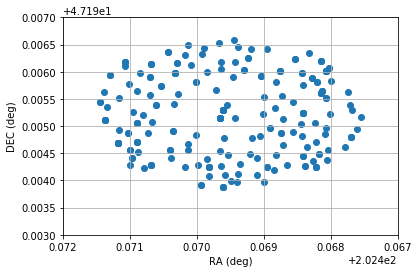

In [18]:
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.xlim(reversed(plt.xlim(202.467,202.472)))
plt.ylim(47.193,47.197)
plt.scatter(hsc_table['ra'], hsc_table['dec'])
plt.grid(True)



### Use Case 3: Retrieve data in a sky region

It is also possible retrieve imaging and catalogue data in a circular sky region. The procedure is very similar to the case of a single object discussed above, but using the query_region_maps() and query_region_catalogs() methods instead of query_object_maps() and query_object_catalogs(). 

Let's first see the case where imaging data are retrieved. To query the region, we have to enter the central coordinates and the radius:

In [19]:
maps = ESASky.query_region_maps(position='13h29m52.7s +47d11m43s', radius='25arcmin')
print (maps)

TableList with 12 tables:
	'0:INTEGRAL' with 18 column(s) and 1 row(s) 
	'1:XMM' with 15 column(s) and 11 row(s) 
	'2:CHANDRA' with 53 column(s) and 17 row(s) 
	'3:XMM-OM-OPTICAL' with 17 column(s) and 12 row(s) 
	'4:XMM-OM-UV' with 17 column(s) and 19 row(s) 
	'5:HST-UV' with 15 column(s) and 139 row(s) 
	'6:HST-OPTICAL' with 15 column(s) and 767 row(s) 
	'7:HST-IR' with 15 column(s) and 234 row(s) 
	'8:ISO-IR' with 18 column(s) and 15 row(s) 
	'9:HERSCHEL' with 15 column(s) and 25 row(s) 
	'10:AKARI' with 11 column(s) and 4 row(s) 
	'11:SPITZER' with 14 column(s) and 6 row(s) 


The difference with the query_object_maps() module is that now we have to explicitly indicate the search radius; if not, an error message is returned.

To search in a region around a given object, we can also enter the object's name instead of its coordinates:

In [20]:
maps = ESASky.query_region_maps(position='M51', radius='25arcmin')
print (maps)

TableList with 12 tables:
	'0:INTEGRAL' with 18 column(s) and 1 row(s) 
	'1:XMM' with 15 column(s) and 11 row(s) 
	'2:CHANDRA' with 53 column(s) and 17 row(s) 
	'3:XMM-OM-OPTICAL' with 17 column(s) and 12 row(s) 
	'4:XMM-OM-UV' with 17 column(s) and 19 row(s) 
	'5:HST-UV' with 15 column(s) and 139 row(s) 
	'6:HST-OPTICAL' with 15 column(s) and 767 row(s) 
	'7:HST-IR' with 15 column(s) and 234 row(s) 
	'8:ISO-IR' with 18 column(s) and 15 row(s) 
	'9:HERSCHEL' with 15 column(s) and 25 row(s) 
	'10:AKARI' with 11 column(s) and 4 row(s) 
	'11:SPITZER' with 14 column(s) and 6 row(s) 


If we compare the result of this query with that of Use Case 1, we will see that now we get more data, because we are using a larger search radius (recall that the search by object uses a radius of only 5 arcsec). In particular, we now have INTEGRAL data, and the number of observations from the other missions has increased.

The query for catalogues works similarly:

In [21]:
cats = ESASky.query_region_catalogs(position='M51', radius='25arcmin', catalogs=['XMM-EPIC', 'HSC'])
print (cats)

TableList with 2 tables:
	'0:XMM-EPIC' with 220 column(s) and 1418 row(s) 
	'1:HSC' with 27 column(s) and 10000 row(s) 


We also note here how the number of rows in each table is larger than before, because of the larger search radius. 

By default, the query returns a maximum of 10,000 rows per table. Note that this limit has been reached for the HSC. If we want to make sure that all the rows are retrieved, we can set the row_limit parameter to -1:

In [22]:
cats = ESASky.query_region_catalogs(position='M51', radius='25arcmin', catalogs=['XMM-EPIC', 'HSC'], row_limit=-1)
print (cats)

TableList with 2 tables:
	'0:XMM-EPIC' with 220 column(s) and 1418 row(s) 
	'1:HSC' with 27 column(s) and 2000 row(s) 


Now the number of rows in the HSC table is 100,000, which is the absolute maximum that can be queried.

Let's now see how the XMM-EPIC table looks like:

In [23]:
xmm_epic_table = cats['XMM-EPIC']
print (xmm_epic_table)

     bii       confused        date_end       ... src_num sum_flag tseries
     deg                                      ...                         
-------------- -------- --------------------- ... ------- -------- -------
68.39369195462        F 2018-06-13T19:09:03.0 ...     136        0    True
68.39512377171        F 2018-06-15T18:54:21.0 ...     128        0    True
68.43946914708        F 2018-05-26T23:40:18.0 ...     302        0   False
68.43970079476        F 2018-05-26T23:40:18.0 ...      77        0    True
68.43988627182        F 2018-06-13T19:09:03.0 ...      74        0    True
68.43971006525        F 2018-05-14T18:58:47.0 ...     107        0    True
68.43974621096        F 2018-06-15T18:54:21.0 ...      91        0    True
68.44024068989        F 2011-06-07T08:38:48.0 ...      42        0   False
68.50160505737        F 2018-06-13T19:09:03.0 ...     131        1   False
68.51018593309        F 2005-07-01T20:18:14.0 ...     141        0   False
           ...      ...  

We are ready to work with the data. For example, let's plot a histogram of the EPIC fluxes:

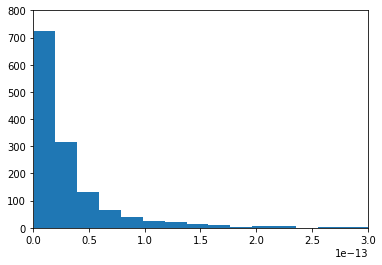

In [24]:
NBINS = 100
plt.xlim(0, 3e-13)
plt.ylim(0,800)
flux = plt.hist(xmm_epic_table['ep_8_flux'], NBINS)